# Saketh Bobbala
## 210968188
### Week 3
### 17/08/2023

Exercise 3 :

Q1) Understanding the Dataset and Pre-processing: Implement the following:
a. Compute and display the number of classes.

b. Compute and display the dimensions of each image.

c. Display one image from each class.

d. Perform normalization.

Q2) Performing experiments on Fully Connected Neural Networks (FCNN):

a. Design a FCNN which is most suitable for the given dataset:
Experimentally choose the best network (the intuitions and learnings from the experiments you have performed in Week-1 and Week-2 will help you choose the hyperparameters for the network).

b. Train and test the network (choose the best epoch size so that there is no overfitting).

c. Plot the performance curves.


Q3) Performing experiments on a Convolutional Neural Networks (CNNs):

a. Design CNN-1 which contains:
• One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0.
• One Pooling layer which uses MAXPOOLING with stride =2.
• One hidden layer having number of neurons = 100

b. Design CNN-2 which contains:
• Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1, and padding =0

• One Pooling layer which uses MAXPOOLING with stride =2.

• One hidden layer having number of neurons = 100

Note: use ReLU activation function after each convolution layer.

c. Train and test the networks (choose the best epoch size so that there is no overfitting).

d. Plot the performance curves for CNN-1 and CNN-2.

e. Compare the performances of CNN-1 and CNN-2.


Q4) Compare the performances of FCNN and CNN.

Q5) Compare the number of parameters in the FCNN and the CNN.

Q6) Discuss the computational efficiency of both networks. Which
one took longer to train and why?

In [1]:
# Importing relevant libraries
import tensorflow as tf
from keras import models, layers
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input ,Flatten
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Loading the data set and splitting it into train and test split
mnist=tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#Number of classes
len(np.unique(y_train))

10

In [4]:
# Dimension of image
x_train.shape[1:]

(28, 28)

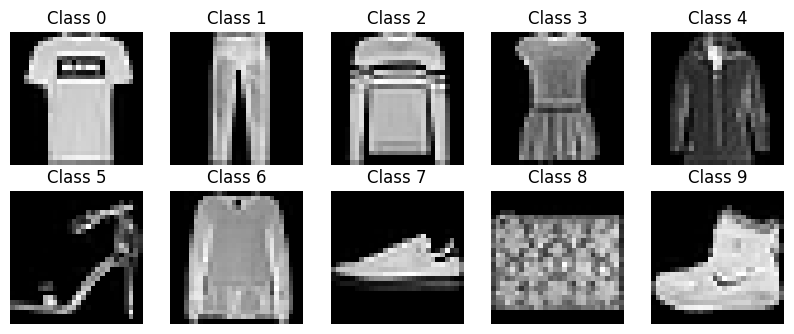

In [5]:
# Displaying one image of each class
plt.figure(figsize=(10, 10))
class_samples = []
for i in range(10):
    sample_idx = np.where(y_train == i)[0][0]
    class_samples.append(sample_idx)
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[sample_idx], cmap='gray')
    plt.title(f"Class {i}")
    plt.axis('off')
plt.show()

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
# Normalization
x_train=x_train/255.0
x_test=x_test/255.0

In [9]:
# Splitting data into validation sets
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# FCNN

In [10]:
# Defining the model
model1= Sequential()
model1.add(layers.Flatten(input_shape=[28,28]))
model1.add(Dense(128, activation= 'relu'))
model1.add(Dense(64, activation= 'relu'))
model1.add(Dense(10,activation='softmax'))


In [11]:
# Architecture
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [12]:
#  Model compiling
opt = keras.optimizers.Adam(learning_rate=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
# Model fitting
history = model1.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/15
782/782 [==============================] - 3s 3ms/step - loss: 0.5319 - accuracy: 0.8102 - val_loss: 0.4862 - val_accuracy: 0.8175
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.4130 - accuracy: 0.8508 - val_loss: 0.4120 - val_accuracy: 0.8562
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3897 - accuracy: 0.8609 - val_loss: 0.4100 - val_accuracy: 0.8573
Epoch 4/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3703 - accuracy: 0.8677 - val_loss: 0.4150 - val_accuracy: 0.8521
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3592 - accuracy: 0.8704 - val_loss: 0.4519 - val_accuracy: 0.8403
Epoch 6/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3626 - accuracy: 0.8694 - val_loss: 0.3885 - val_accuracy: 0.8653
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3512 - accuracy: 0.8743 - val_loss: 0.3786 - val_accuracy: 0.8685
Epoch 

In [14]:
# Test loss and accuracy
test_loss, test_acc = model1.evaluate(x_test, y_test)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8544
Accuracy: 0.8543999791145325
Loss:  0.4496135711669922


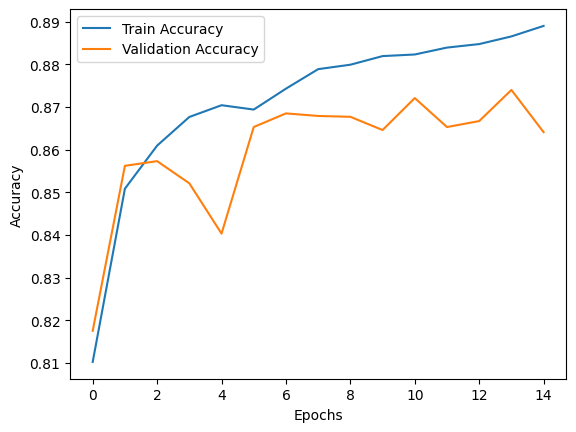

In [15]:
# Performance curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 0s 1ms/step


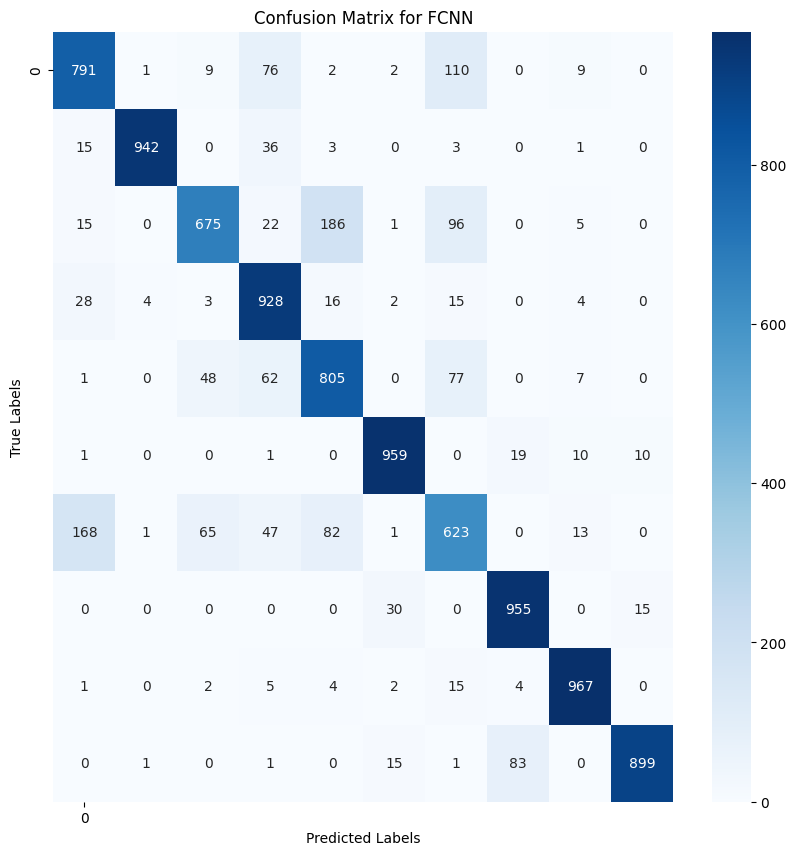

In [16]:
# Confusion Matrix
y_pred=model1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_testcm = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testcm,y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=10, yticklabels=10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for FCNN')
plt.show()

# CNN-1

In [17]:
# Defining the model
cnn1 = models.Sequential()
cnn1.add(layers.Conv2D(32, (5, 5), strides=(1, 1),activation='relu',padding="valid", input_shape=(28, 28, 1)))
cnn1.add(layers.MaxPooling2D((2, 2)))
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(100, activation='relu'))
cnn1.add(layers.Dense(10, activation='softmax'))
cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# Architecture
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [19]:
# Fitting the model
history1 = cnn1.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 15s 18ms/step - loss: 0.4475 - accuracy: 0.8441 - val_loss: 0.3342 - val_accuracy: 0.8806
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3115 - accuracy: 0.8874 - val_loss: 0.3191 - val_accuracy: 0.8869
Epoch 3/5
782/782 [==============================] - 15s 20ms/step - loss: 0.2646 - accuracy: 0.9035 - val_loss: 0.2721 - val_accuracy: 0.9018
Epoch 4/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2303 - accuracy: 0.9163 - val_loss: 0.2713 - val_accuracy: 0.8991
Epoch 5/5
782/782 [==============================] - 16s 20ms/step - loss: 0.2067 - accuracy: 0.9251 - val_loss: 0.2632 - val_accuracy: 0.9068


In [20]:
# Test loss and accuracy
test_loss, test_acc = cnn1.evaluate(x_test, y_test)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.2718 - accuracy: 0.9026
Accuracy: 0.9025999903678894
Loss:  0.2717916965484619


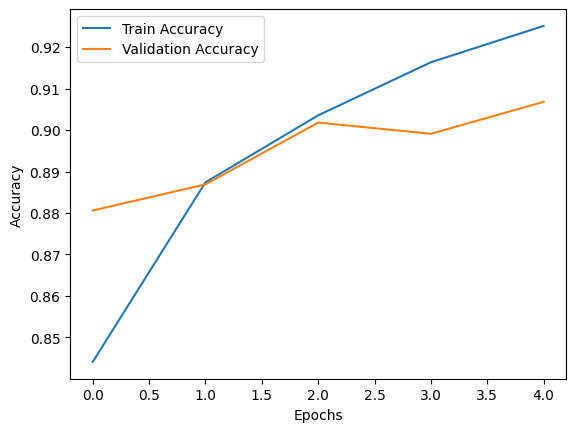

In [21]:
# Performance curve
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 1s 4ms/step


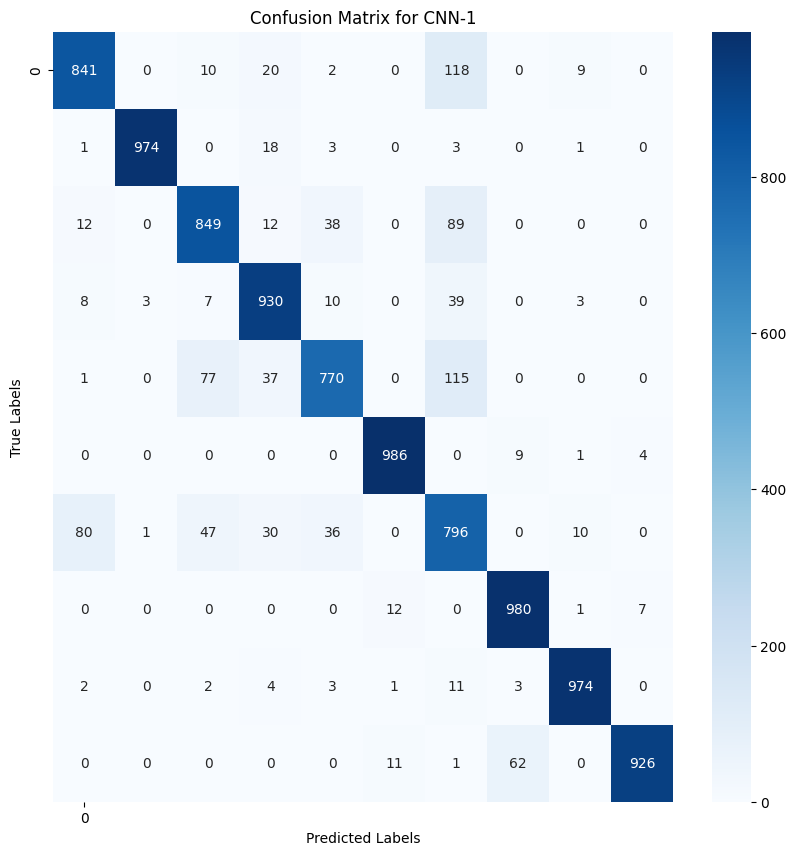

In [22]:
# Confusion Matrix
y_pred=cnn1.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_testcm,y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=10, yticklabels=10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN-1')
plt.show()

# CNN2

In [23]:
# Defining the model
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(32, (3, 3), strides=(1, 1),activation='relu',padding="valid", input_shape=(28, 28, 1)))
cnn2.add(layers.Conv2D(32, (3, 3), strides=(1, 1),activation='relu',padding="valid"))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(100, activation='relu'))
cnn2.add(layers.Dense(10, activation='softmax'))
cnn2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Architecture
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               460900    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                      

In [25]:
# Fitting the model
history2 = cnn2.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 39s 49ms/step - loss: 0.4267 - accuracy: 0.8482 - val_loss: 0.3053 - val_accuracy: 0.8912
Epoch 2/5
782/782 [==============================] - 41s 52ms/step - loss: 0.2704 - accuracy: 0.9020 - val_loss: 0.2578 - val_accuracy: 0.9053
Epoch 3/5
782/782 [==============================] - 43s 54ms/step - loss: 0.2200 - accuracy: 0.9193 - val_loss: 0.2739 - val_accuracy: 0.9028
Epoch 4/5
782/782 [==============================] - 40s 51ms/step - loss: 0.1836 - accuracy: 0.9321 - val_loss: 0.2305 - val_accuracy: 0.9177
Epoch 5/5
782/782 [==============================] - 39s 50ms/step - loss: 0.1536 - accuracy: 0.9441 - val_loss: 0.2426 - val_accuracy: 0.9140


In [26]:
# Test loss and accuracy
test_loss, test_acc = cnn2.evaluate(x_test, y_test)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.2576 - accuracy: 0.9108
Accuracy: 0.9107999801635742
Loss:  0.25759783387184143


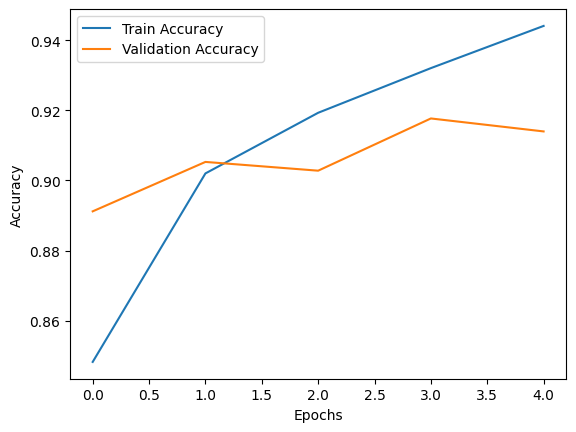

In [27]:
# Performance curve
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 2s 7ms/step


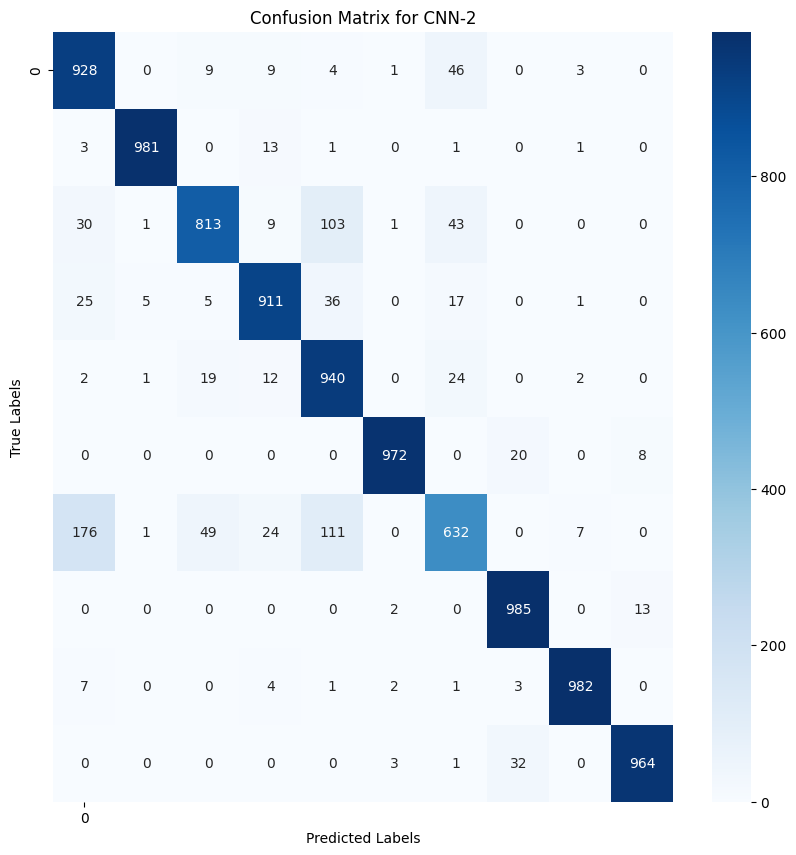

In [28]:
# Confusion Matrix
y_pred=cnn2.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_testcm,y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=10, yticklabels=10)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CNN-2')
plt.show()

# Performance between CNN1 and CNN2

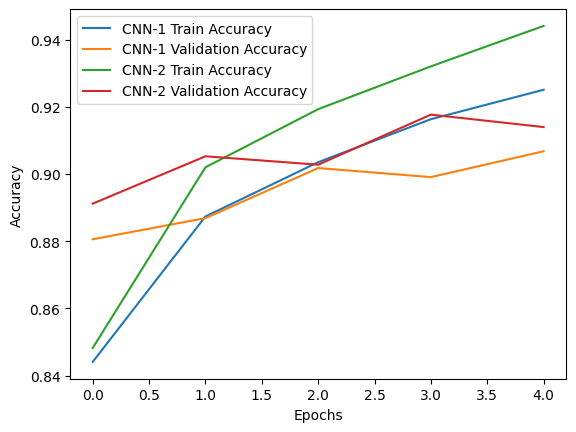

In [29]:
plt.plot(history1.history['accuracy'], label='CNN-1 Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='CNN-1 Validation Accuracy')
plt.plot(history2.history['accuracy'], label='CNN-2 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='CNN-2 Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Performance between FCNN and CNN

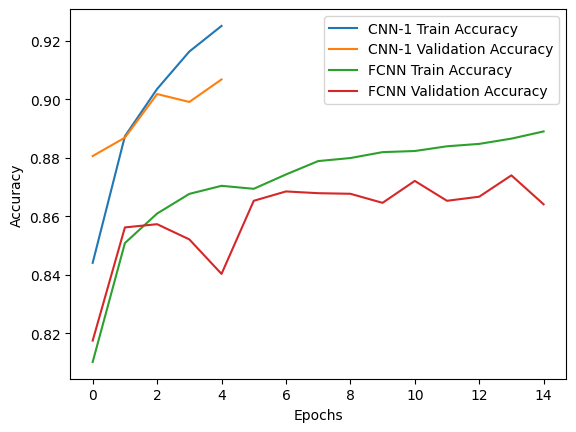

In [30]:
plt.plot(history1.history['accuracy'], label='CNN-1 Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='CNN-1 Validation Accuracy')
plt.plot(history.history['accuracy'], label='FCNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

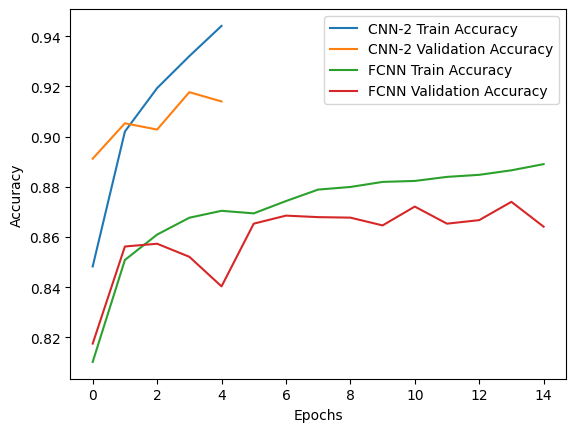

In [31]:
plt.plot(history2.history['accuracy'], label='CNN-2 Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='CNN-2 Validation Accuracy')
plt.plot(history.history['accuracy'], label='FCNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='FCNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Number of parameters in FCNN, CNN1, CNN2


In [32]:
model1.summary()
# Trainable params: 109,386

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [33]:
cnn1.summary()
# Total params: 462,742

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               460900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462,742
Trainable params: 462,742
Non-trainable params: 0
________________________________________________

In [34]:
cnn2.summary()
# Total params: 471,478

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 100)               460900    
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                      

# Computational efficiency of both networks

CNN took longer to train in this case compared to FCNN because convolutional operations are more computationally intensive than fully connected layers, but CNNs are still computationally efficient because of sparse connectivity and shared weights.